# Crime Reports
In this section, we will be going over the reported crime in Allegheny County from 2020.

In [1]:
##Start by importing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
arrest = pd.read_csv("arrests.csv")

In [2]:
##This sorts the data into number of offenses by neighborhood
filterarrest = arrest.groupby("INCIDENTNEIGHBORHOOD")["OFFENSES"].count()
finalarrest = pd.DataFrame(filterarrest)
finalarrest = finalarrest.sort_values("OFFENSES", ascending=False)
finalarrest["Neighborhood"] = finalarrest.index
finalarrest

,OFFENSES,Neighborhood
INCIDENTNEIGHBORHOOD,,
Central Business District,3313,Central Business District
South Side Flats,2840,South Side Flats
Carrick,1960,Carrick
East Allegheny,1770,East Allegheny
Homewood South,1741,Homewood South
...,...,...
Regent Square,28,Regent Square
Central Northside,23,Central Northside
Mt. Oliver Boro,18,Mt. Oliver Boro


This makes the information of the data set specific to what we need to analyze, which makes further analysis easier to do.

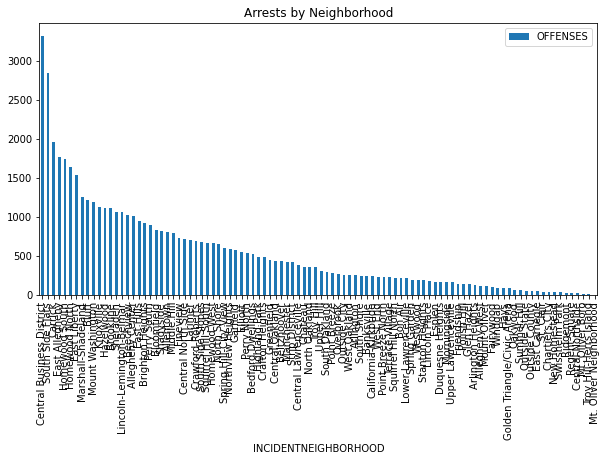

In [3]:
##This plots the crime by neighborhood on a bar graph
finalarrest.plot.bar(title="Arrests by Neighborhood", figsize=(10,5))

This visualizes our information a little more clearly, but the representation is cluttered and messy. Let's fix that.

(40.36, 40.63)

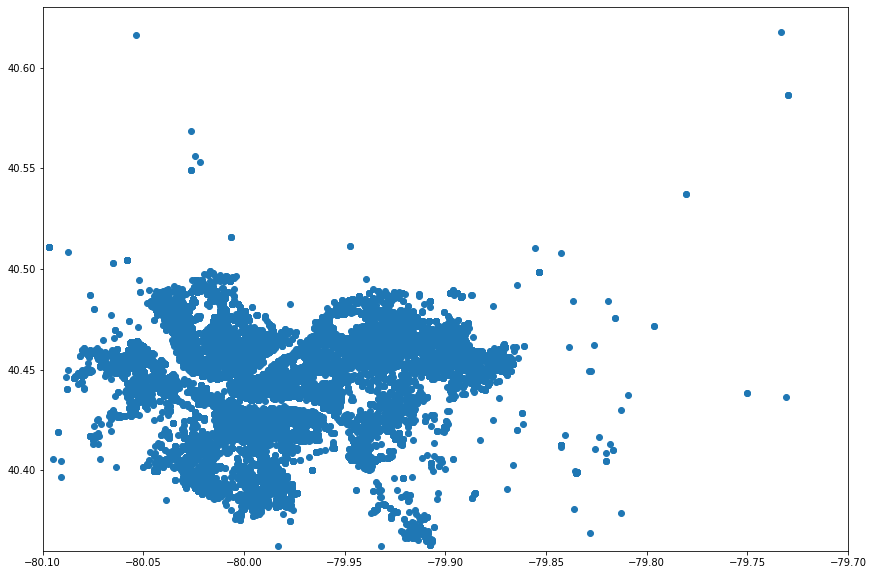

In [4]:
arrests_frame = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f").dropna(subset=["X","Y"])
arrest_map = geopandas.GeoDataFrame(arrests_frame, geometry=geopandas.points_from_xy(arrests_frame.X, arrests_frame.Y))

arrest_map.plot(figsize=(15,10))
plt.xlim([-80.10, -79.7])
plt.ylim([40.36, 40.63])

This is much more sensible to look at. With the reference image of the city of Pittsburgh below, you can see how the map of crimes in Allegheny county has a strong resemblance.

In [34]:
##This pulls in the 
local_map = "https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/4af8e160-57e9-4ebf-a501-76ca1b42fc99/download/pittsburghpaneighborhoods-.geojson"
neighborhoods = geopandas.read_file(local_map).set_index("hood")
neighborhoods.plot( figsize=(10,10)) # plot the geopandas dataframe

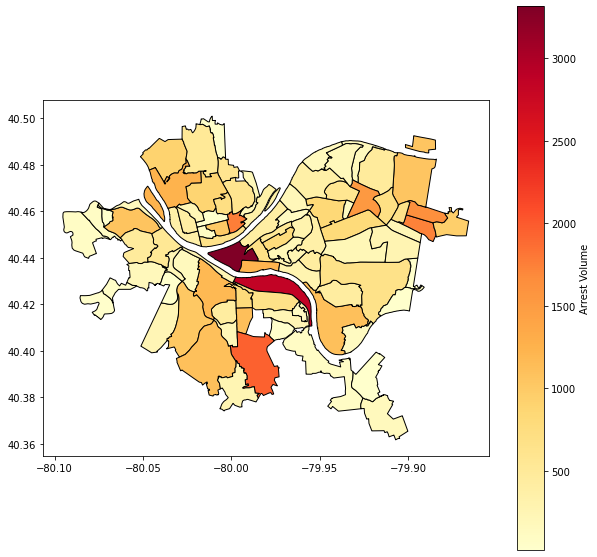

In [35]:
new_arrest_map = neighborhoods.merge(finalarrest, how='left', left_on='hood', right_on='Neighborhood')

new_arrest_map.plot(figsize=(10,10), column = "OFFENSES",
                    cmap = "YlOrRd",
                   legend = True,
                   legend_kwds = {"label":"Arrest Volume"},
                   edgecolors = "black")

This now allows us to visualize the areas in Pittsburgh that have the highest instances of recorded crime.

Fortunately, the way the dataframe is organized means that it is already ranked in order of highest to lowest crime, so the ranking is as follows:

In [36]:
count = 0
for x in finalarrest.index:
    print(str(int(count)+1)+".", finalarrest.index[count])
    count = count + 1

1. Central Business District
2. South Side Flats
3. Carrick
4. East Allegheny
5. Homewood South
6. Homewood North
7. East Liberty
8. Marshall-Shadeland
9. Bluff
10. Mount Washington
11. Knoxville
12. Hazelwood
13. Brookline
14. Sheraden
15. Lincoln-Lemington-Belmar
16. Beechview
17. Allegheny Center
18. East Hills
19. Brighton Heights
20. Perry South
21. Bloomfield
22. Shadyside
23. Allentown
24. Middle Hill
25. Fineview
26. Central North Side
27. Larimer
28. Crawford-Roberts
29. South Side Slopes
30. Squirrel Hill South
31. Homewood West
32. North Shore
33. Spring Hill-City View
34. Northview Heights
35. Garfield
36. Elliott
37. Perry North
38. Bedford Dwellings
39. Highland Park
40. Crafton Heights
41. Greenfield
42. Central Oakland
43. Beltzhoover
44. Manchester
45. Strip District
46. Central Lawrenceville
47. Chateau
48. North Oakland
49. Troy Hill
50. Upper Hill
51. South Oakland
52. Point Breeze
53. Overbrook
54. Outside City
55. West Oakland
56. Arlington
57. South Shore
58. Ban